<a href="https://colab.research.google.com/github/DS3001/group10/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 10: Betsy Altenburger, Autumn Boaz, Olivia Byram, Alex Yang, Olivia Yang**

## **Confidence in American Medical Systems**

**Summary:**


Our primary research question when approaching this project was “what are the general trends of Americans’ confidence in medical institutions, and are there demographic factors that influence this?”. In short, we were hoping to gain a deeper understanding into whether Americans' trust in these institutions oscillates, which could provide insight into whether this correlates with economic or social events. We included other institutions to compare these confidence levels. We chose to focus on medical institutions because if they can correlate a smaller confidence with certain economic/social events,  they will be able to predict and account for this in the future, which can help to prevent us from economic devastation, since medicine is a large part of our economy. The strategy to answer this question included cleaning the data, then creating visualizations to represent the fluctuations throughout the years, as well as visualizations of the confidence overall. Our first action after developing this question was collecting and cleaning the data. We used the General Social Survey (GSS) for all of the data in this project. We imported the raw data that we gathered from this survey, and cleaned it with several methods. We dropped several rows that contained no information, as well as adjusting all of the columns so they had the correct mappings to correlate to the codebook, and  checked for nans throughout the data. Once we were satisfied that our data had been sufficiently cleaned, we moved forward to the visualization and summarization processes. We created a variety of visualizations instead of one main visualization as a way to confirm our conclusions and examine the data from multiple angles. The visualizations that provided us the best insights were the density plot of ‘conhlth’ by race and the line plot of other institutions compared to the medical institutions. These visualizations provided us with interesting results, the first being that race is likely not a factor in whether an individual has a low or high confidence level. We also found it interesting that compared to other institutions, medicine rose and fell through the years in a similar fashion. Overall, we found that Americans’ generally have ‘some confidence’ in these institutions, and this does not seem to be skewed by demographic information.

**Data:**

In the summary above, it was stated that our primary research question is “what are the general trends of Americans’ confidence in medical institutions, and are there demographic factors that influence this?”. To answer this question, we had to collect multiple variables of interest from the General Social Survey (GSS). The primary variables that we are interested in are ‘conmedic’ and ‘conhlth’. The former represents the confidence each subject had in medicine. The answer choices were: great deal of confidence, only some confidence, or hardly any confidence at all. We chose this specific variable to focus most of our research on, because we were interested in seeing how confidence in medicine fluctuated since there have been several widespread diseases in the last 50 years (HIV, COVID-19, etc.). The second variable, ‘conhlth’ represents confidence in health care provided. The responses for this variable were: complete confidence, a great deal of confidence, some confidence, very little confidence, and no confidence at all. This variable is important for similar reasons to ‘conmedic’. We included other variables in the data that we cleaned as well, totaling 23 columns with 73297 rows. Some notable variables include year, age, race, and polviews (where the subject would place themselves from liberal to conservative).

The first challenge with this data arose almost immediately, as we quickly realized the data was incredibly large and hard to read into Google Collab. We had to select the variables that we wanted from the GSS website, which were then fortunately combined into a much smaller CSV for us to read in. Once we were able to read this in, we ran into our second obstacle. Seven of our rows showed just column names, there was no data in these rows. We had to find these seven rows, and remove them from the dataframe. We now have a dataset with 23 columns, 73290 rows, and strings in each column saying things such as “only some” and “a great deal”. The answers that were given to the survey questions were recorded as these phrases, and each correlates to a number in the GSS (typically one through 3, although some have more responses). In order to sort these and create visualizations easier, we mapped the phrases to their corresponding number. We could not use dummy variables, since there were more than two options, and dummy variables are used for variables that are either 0 or 1. The first column that we mapped was ‘polview’. There were seven options for this {'extremely liberal': 1, 'liberal': 2, 'slightly liberal': 3, 'moderate, middle of the road':4, 'slightly conservative':5, 'conservative':6, 'extremely conservative':7}. By using the “.map()” function, we were able to switch these strings into their corresponding numbers. We did the same technique for ‘conhlth’, which had five responses that we needed to map. The remaining variables (excluding sex, age, race, and year) had three responses that were the same, so we were able to use the same .map() function for all of them. Finally, we coerced year and age to become numeric rather than strings, and checked our columns for NaNs.

Data cleaning took us longer than expected to finish, primarily because we ran into the difficulties loading the data. We also had to spend time looking through the codebook in order to correctly map our variables. It was somewhat challenging that some of the variables had five categories of responses, while some only had three. This made mapping more tedious, and seemed to be an inconsistency that the GSS should look further into.


**The code for the data cleaning is at the bottom of this notebook.**

**Results:**

In [ ]:
#setting up packages used in this visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cloning git repo
! git clone https://www.github.com/DS3001/group10

Cloning into 'group10'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 80 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (80/80), 5.38 MiB | 8.65 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
#Clean data is found in the git repo
df = pd.read_csv("./group10/clean_gss_data.csv")

It is important to note that as confidence levels increase, the confidence is getting lower. For example, level 3 means that there is less confidence in the institution than level 1. We started off our visualizations by creating two histograms to showcase our two highlighted variables, ‘conhlth’ and ‘conmedic’. We chose to do this because histograms are a great representation when looking at discrete variables. Since we used ‘count’ as our y-axis, we were able to clearly see the number of responses for each confidence level. Looking at the ‘conhlth’ variable first, the highest count is clearly level 3 (‘some confidence’). Levels 2 and 4 (‘a great deal of confidence’ and ‘very little confidence’ respectively) were the two next highest, with about equal counts. The next histogram deals with the variable ‘conmedic’. This histogram looks much different than the prior one, due to an incredibly low count of the confidence level 3 (‘hardly any’). We had previously assumed that confidence levels for medicine would be similar to the confidence levels for health care, but were somewhat proven wrong when comparing these two histograms. There seems to be much greater confidence in medicine in general, which could be due to underlying factors such as race or gender of the subjects surveyed.

Text(0.5, 1.0, 'Confidence Level of Health Care Histogram')

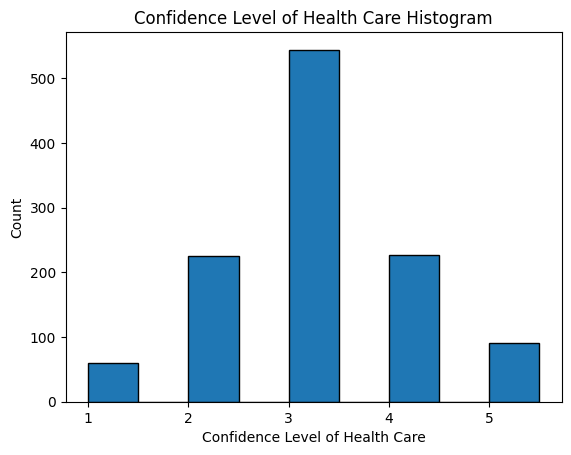

In [ ]:
#Making a histogram for conhlth

#define variable of interest
var = "conhlth" #confidence in health system (scale of 1-5)

bin_edges = np.arange(1, 6, .5) #define histogram bin width
plt.hist(df[var], bin_edges, edgecolor = "k") #plot histogram with the defined width

#define labels
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Confidence Level of Health Care")
plt.ylabel("Count")
plt.title("Confidence Level of Health Care Histogram")

Text(0, 0.5, 'Count')

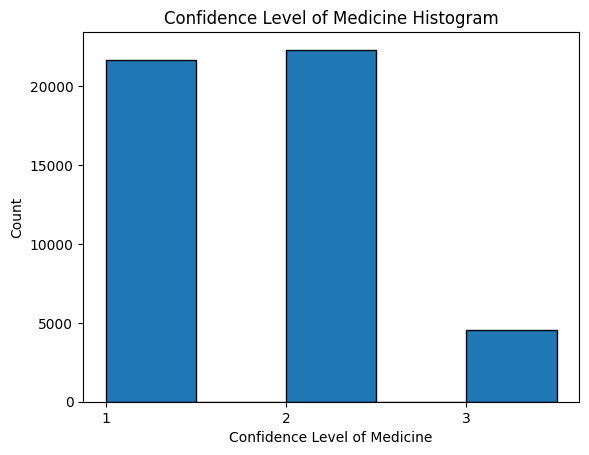

In [ ]:
#making a histogram for conmedic

#define variable of interest
var = "conmedic" #confidence in medicine (scale 1-3)

bin_edges = np.arange(1, 4, .5) #sets bin width for histogram
plt.xticks([1, 2, 3])
plt.hist(df[var], bin_edges, edgecolor = "k") #plot histogram with specificed bin width

#define labels
plt.title("Confidence Level of Medicine Histogram")
plt.xlabel("Confidence Level of Medicine")
plt.ylabel("Count")

Once we noticed that the histograms of ‘conhlth’ and ‘conmedic’ were different, we decided the next visualization we should create is a kernel density plot of confidence in health systems grouped by race. The thought process of this was that a kernel density plot grouped by race would help to remove some of the underlying factors that may be causing the histograms to be different. We quickly identified that the primary race represented in the surveyed data is white, which could be an indicator as to why the confidence levels may be high, as America has disproportionate health care equity. However, looking at the lines that represent the other two races, black and other, we notice a similar pattern as the line for white. They all peak with the third level, which shows us that our data is likely not skewed by race. Despite this, it is always a good idea to collect more data that is increasingly representative of all races, instead of primarily white.

Text(0.5, 0, 'Confidence in Health System')

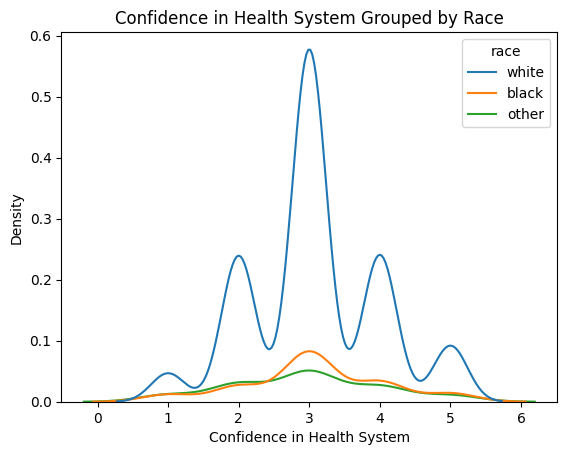

In [ ]:
#making a kernel density plot of conhlth grouped by race

#define variable names
var = "conhlth"#confidence in health system (scale 1-3)
cat2 = "race" #three cat variables black, while, and other

sns.kdeplot(data=df, x=var, hue = cat2) #plot density plot grouped by "race"

#define labels
plt.title("Confidence in Health System Grouped by Race")
plt.xlabel("Confidence in Health System")

Next, we have a boxplot with the statistical summary for ‘conhlth’. The statistical summary tells us that the count of responses is 1147, the mean is 3.05 and the standard deviation is .958. These are all represented in the box plot. It reinforces the idea that most people chose 3 as their level of confidence, with 1 being shown as an outlier on the boxplot. This is interesting since the histogram did not do a great job of showing that 1 was low enough to be an outlier, we now have an idea of how low the number of responses with confidence level 1 were.

count    1147.000000
mean        3.055798
std         0.958306
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: conhlth, dtype: float64


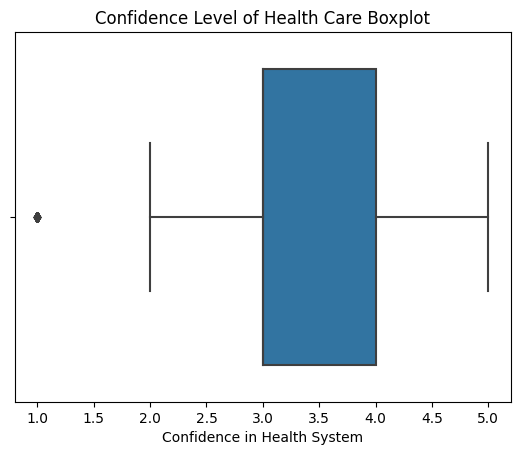

In [ ]:
#Making a boxplot for conhlth

#define variable of interest
var = "conhlth" #confidence in medicine (scale 1-3)

#make boxplot using seaborn
sns.boxplot(data=df, x=var)

#set labels for graphs
plt.xlabel("Confidence in Health System")
plt.title("Confidence Level of Health Care Boxplot")
print(df[var].describe())

We appreciated the information that our first boxplot gave us, so we decided to create another one that was slightly more advanced. We used the same variable, ‘conhlth’, but grouped this by race. Once again, we are interested in seeing the role that race plays on the subjects’ answers. All three race categories had a median of 3, which shows that the majority of people chose this, regardless of race. However, the ‘black’ race and ‘white’ race both had the same standard deviation and interquartiles, while ‘other race’ had a large standard deviation. There were no outliers for ‘other race’, but ‘black’ and ‘white’ both had an outlier at 1, which corresponds to the first boxplot. Overall, the data in this boxplot seems to be fairly symmetric, with ‘black’ and ‘white’ slightly skewed to the right. This tells us that subject’s who identified with those races felt less confident about healthcare than the median. Even though we have previously noted that there were more subjects who identified as white, their confidence distributions have remained similar, once again discounting that this could be a confounding variable.

Text(0, 0.5, 'Confidence Level')

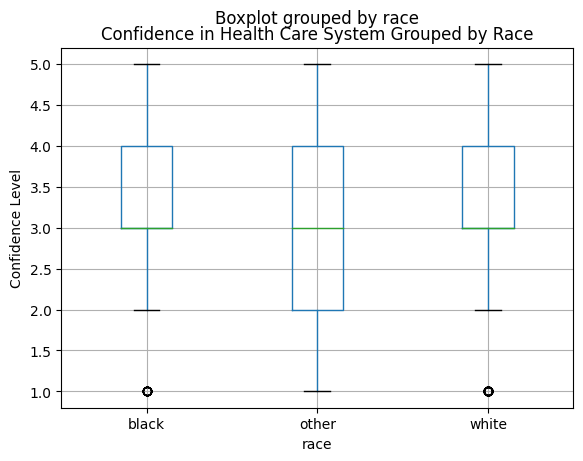

In [ ]:
#making a grouped boxplot of conhlth grouped by race

#define variable names
var = "conhlth" #confidence in health system (scale 1-3)
cat2 = "race" #three cat variables black, while, and other

df.boxplot(column = var, by = cat2) #plot boxplot grouped by "race"

#define plot labels
plt.title("Confidence in Health Care System Grouped by Race")
plt.ylabel("Confidence Level")

After deciding that race is likely not a variable that is causing differences in confidence levels, we decided to take a look at sex. This data only includes ‘male’ and ‘female’ as their answers for sex, which we note could be problematic. We created another kernel density plot to examine the ‘conhlth’ variable grouped by sex. There were more women than men who took this survey, but the densities are close enough that this does not seem to be an issue. The patterns of both the male and female lines in this density plot are very similar, they follow almost the exact same pattern. Confidence level 3 is the highest for both, while level 1 is the smallest. This provides us with evidence that men and women both have similar viewpoints on their level of confidence in health care, but we decided to look at a boxplot in order to confirm this.

Text(0.5, 0, 'Confidence in Health System')

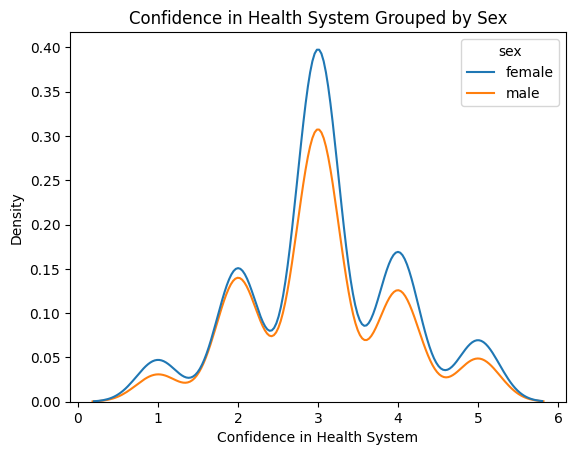

In [ ]:
#density plot for conhlth and grouped by sex

#define variables
var = "conhlth" #confidence in health system (scale 1-3)
cat2 = "sex" #two cat variables male and female

sns.kdeplot(data=df, x=var, hue = cat2) #plot kernel density plot for confidence in health system grouped by sex

#define labels
plt.title("Confidence in Health System Grouped by Sex")
plt.xlabel("Confidence in Health System")

The boxplot that we created to look at ‘conhlth’ grouped by sex shows us a deeper story than the kernel density plot. Both male and female have the same median, but female is skewed to the right, while male is symmetric. Female also includes an outlier at 1, while male does not. Due to this, we can conclude that there may be a slight difference between male and women answers to the survey. Since females had a higher number of answers than men, this means that the data is potentially skewed to have confidence levels closer to 4 and 5 for the ‘conhlth’ variable. Since the higher confidence levels mean lower confidence in this data, there may be less confidence in ‘conhlth’ due to more women answering the survey who do not have large amounts of confidence in the healthcare system.

Text(0, 0.5, 'Confidence Level')

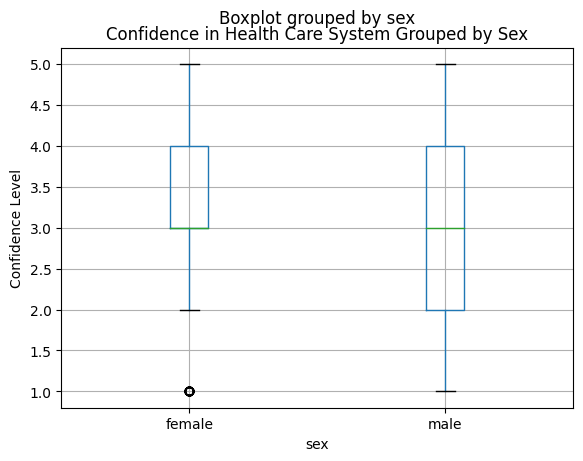

In [ ]:
#boxplot for conhlth grouped by sex

#define variables
var = "conhlth" #confidence in health system (scale 1-3)
cat2 = "sex" #two cat variables male and female

df.boxplot(column = var, by = cat2) #plot box plot for confidence in health system grouped by sex

#define labels
plt.title("Confidence in Health Care System Grouped by Sex")
plt.ylabel("Confidence Level")

Finally, as a last bit of analysis, we were interested in comparing the confidence in medicine to the confidence in other institutions. We thought that ‘conmedic’ would be an interesting variable to compare since we wanted to get a more in depth look into one of the aspects of healthcare. Healthcare is difficult to generalize, so looking specifically into the medicine aspect versus other institutions could give us clearer insight. We created a line plot that represents the fluctuations in confidence intervals throughout several institutions between 1972 and 2022. Immediately, it’s shown that Congress has had the most drastic increases in confidence levels. If you remember that confidence levels are worse as the levels get higher, this is not a good thing for Congress. In addition, we see a fairly steady rise in the lack of confidence for medicine throughout the years. There is a rise in the confidence level at 2020, which is likely due to the COVID-19 pandemic and a lack of trust for the vaccine. Other institutions follow similar trends, most notably confidence in science. Science and medicine both intersect in terms of policies and regulations, so it is not surprising to see that their levels have similar trends.

Text(0.5, 1.0, 'Line graph of Confidence in Science, Medicine, Congress, Religion and Education Over Years')

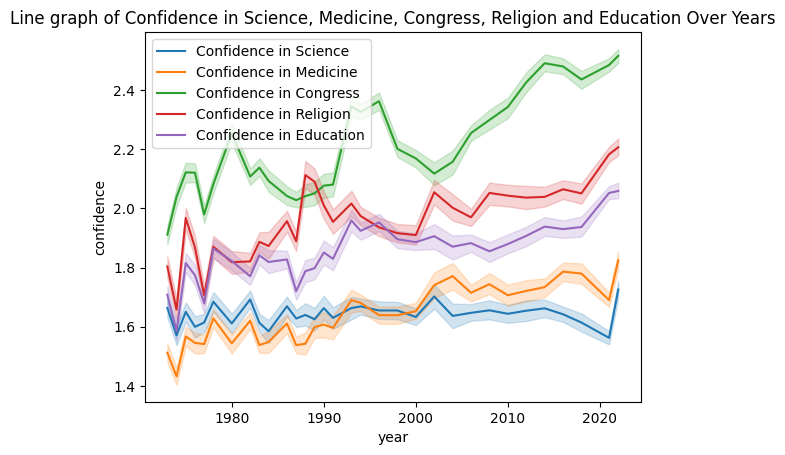

In [ ]:
#Making a line graph of confidence in science, medicine, congress, religion, and education over the years

#define variable
var1 = "consci"
var2 = "conmedic"
var3 = "conlegis"
var4 = "conclerg"
var5 = "coneduc"

#make plots using seaborn lineplot
sns.lineplot(data=df, x="year", y=var1, label="Confidence in Science")
sns.lineplot(data=df, x="year", y=var2, label="Confidence in Medicine")
sns.lineplot(data=df, x="year", y=var3, label="Confidence in Congress")
sns.lineplot(data=df, x="year", y=var4, label="Confidence in Religion")
sns.lineplot(data=df, x="year", y=var5, label="Confidence in Education")

#define labels
plt.ylabel("confidence")
plt.title("Line graph of Confidence in Science, Medicine, Congress, Religion and Education Over Years")

**Conclusion:**

Overall, we are able to answer our research question with confidence. A few critiques and concerns that typically arise with research are data collection, missing data, and bias in questions. The data must be collected from a reputable source, it must be correctly cleaned in order to be accurate, and the question must not be misleading the visualizations to show something that isn’t really there. We collected our data from the General Social Survey, which is reputable and uses standard, fair surveying techniques. We cleaned our data to ensure there were odd values that could skew our data and cause issues in our findings. Finally, we used statistical methods to create visualizations that provided accurate representations of the data. Our research question “what are the general trends of Americans’ confidence in medical institutions, and are there demographic factors that influence this?” was open-ended and did not have implicit bias that could lead to us attempting to create or interpret visualizations in a misleading manner. We had several versions of our visualizations, and chose the ones that provided the most interesting and representative takeaways.

Through analyzing these multiple graphical and numerical summaries, we have found that Americans’ tend to have ‘some confidence’ in healthcare systems and medicine. We do not believe that this is being influenced by demographics, although we would preferably like to look further into the ‘male’ and ‘female’ answers to confirm this. There is not an abundance of trust in medical institutions, yet there is also not a lack of it. Most subjects that answered this survey are middle of the road, with just ‘some’ confidence in these institutions.

Additional work that was outside the scope of this specific project includes combining more datasets with this one, and looking further into the other institutions to see more of the ways that they interact with confidence in healthcare systems/medicine. If we were able to find more datasets with similar surveys, we could ensure that there is no bias in our data. This is due to the fact that the data would have been collected in different ways, so we would have multiple variations of data to look through and compare. If we had more time, we would have loved to investigate further into other institutions. We were intrigued by the way confidence in science had a similar trend to confidence in medicine, and we all wanted to dive deeper into the confidence in Congress. Congress typically sets regulations for medical institutions, so this would be a fascinating relationship to explore.
In conclusion, there is neither high nor low confidence in medical institutions in America. The confidence has fluctuated some throughout the years, but remains fairly steady. This could be used to find and target demographics that may not have as much trust in the institutions, to help create more credibility for these organizations.


### **Appendix**
**Data Cleaning Code:**

In [ ]:
#Subsetting our variables of interest from the original dataset
import pandas as pd

var_list = ['year', 'age', 'sex', 'race', 'polviews', 'confinan','conbus','conclerg',
                   'coneduc', 'confed', 'conlabor', 'conpress','conmedic','contv',
                   'conjudge', 'consci', 'conlegis', 'conarmy','conpharvac',
                   'conpharvacy','confedvac', 'confedvacy', 'conhlth'] # List of variables to save
output_file = 'raw_gss_data.csv' # Name of the file to save the data to

parser = pd.read_csv('gss.csv', iterator=True, chunksize=10000, low_memory=False) # Creates a parser for the whole data
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for chunk in parser: # For each chunk of the data
    print(chunk.loc[:,var_list].head()) # Visually inspect the first few rows
    chunk.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                                 mode=modes[phase], # control write versus append
                                 header=var_list, # variable names
                                 index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

   year   age     sex   race polviews confinan conbus conclerg coneduc confed  \
0  1972  23.0  female  white      NaN      NaN    NaN      NaN     NaN    NaN   
1  1972  70.0    male  white      NaN      NaN    NaN      NaN     NaN    NaN   
2  1972  48.0  female  white      NaN      NaN    NaN      NaN     NaN    NaN   
3  1972  27.0  female  white      NaN      NaN    NaN      NaN     NaN    NaN   
4  1972  61.0  female  white      NaN      NaN    NaN      NaN     NaN    NaN   

   ... contv conjudge consci conlegis conarmy conpharvac conpharvacy  \
0  ...   NaN      NaN    NaN      NaN     NaN        NaN         NaN   
1  ...   NaN      NaN    NaN      NaN     NaN        NaN         NaN   
2  ...   NaN      NaN    NaN      NaN     NaN        NaN         NaN   
3  ...   NaN      NaN    NaN      NaN     NaN        NaN         NaN   
4  ...   NaN      NaN    NaN      NaN     NaN        NaN         NaN   

  confedvac  confedvacy  conhlth  
0       NaN         NaN      NaN  
1       Na

In [ ]:
gss = pd.read_csv('raw_gss_data.csv', low_memory=False)

In [ ]:
gss['year'].unique #double checking that all years were loaded

<bound method Series.unique of 0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
72392    2022
72393    2022
72394    2022
72395    2022
72396    2022
Name: year, Length: 72397, dtype: object>

In [ ]:
# importing pandas and numpy for data cleaning
import pandas as pd
import numpy as np

In [ ]:
# the raw file is found in the git repo
df = pd.read_csv("raw_gss_data.csv")
# the raw data was already subsections to only included the columns we wanted to look at
df.columns

Index(['year', 'age', 'sex', 'race', 'polviews', 'confinan', 'conbus',
       'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic',
       'contv', 'conjudge', 'consci', 'conlegis', 'conarmy', 'conpharvac',
       'conpharvacy', 'confedvac', 'confedvacy', 'conhlth'],
      dtype='object')

In [ ]:
# weird thing happens and there are 7 rows with just the column names
# this shows all the rows like this so I could see which indexes to drop
df.loc[df['polviews'] == 'polviews']

# Dropping all the rows with the column names instead of values
df = df.drop([10000,20001,30002,40003,50004,60005,70006])
df.loc[df['polviews'] == 'polviews']

,year,age,sex,race,polviews,confinan,conbus,conclerg,coneduc,confed,...,contv,conjudge,consci,conlegis,conarmy,conpharvac,conpharvacy,confedvac,confedvacy,conhlth


In [ ]:
# This mapping is based on codebook. The scale was from extremely liberal to extremely conservative
# We decided the numerical values would be easier to use for graphs because long string values
# on the a-xais makes a graph harder to read
df['polviews'] = df['polviews'].map({'extremely liberal': 1, 'liberal': 2, 'slightly liberal': 3,
                                     'moderate, middle of the road':4,
                                    'slightly conservative':5, 'conservative':6, 'extremely conservative':7})

# I looked at the value counts to make sure all the variables were converted to numeric values
df['polviews'].value_counts()

4.0    23992
5.0     9596
6.0     9361
3.0     7900
2.0     7623
7.0     2165
1.0     2081
Name: polviews, dtype: int64

In [ ]:
# The maping of conhlth varaible is different than the polical views mapping, so
# I printed this out to see them all
print(df['conhlth'].unique())
# I used the codebook to find the correct numerical mappings of complete confidence to no confidence at all
df['conhlth'] = df['conhlth'].map({'complete confidence': 1, 'a great deal of confidence': 2, 'some confidence': 3,
                                   'very little confidence':4,'no confidence at all':5})
df['conhlth'].value_counts()

[nan 'some confidence' 'very little confidence' 'no confidence at all'
 'a great deal of confidence' 'complete confidence']


3.0    544
4.0    227
2.0    225
5.0     91
1.0     60
Name: conhlth, dtype: int64

In [ ]:
# these are all the varibles with the mapping "a great deal" to "hardly any" on the confidence scale
cols = ['confinan', 'conbus',
       'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic',
       'contv', 'conjudge', 'consci', 'conlegis', 'conarmy', 'conpharvac',
       'conpharvacy', 'confedvac', 'confedvacy']

# as they are all the same mapping I used a loop
# I then printed out all the unique values in the newly mapped variable to make sure it was just 1,2,3 and nans
for i in cols:
  df[i] = df[i].map({'a great deal': 1, 'only some': 2, 'hardly any': 3})
  print(df[i].unique())

[nan  1.  2.  3.]
[nan  2.  1.  3.]
[nan  3.  1.  2.]
[nan  1.  3.  2.]
[nan  2.  1.  3.]
[nan  2.  3.  1.]
[nan  2.  3.  1.]
[nan  2.  1.  3.]
[nan  3.  2.  1.]
[nan  1.  2.  3.]
[nan  2.  1.  3.]
[nan  2.  1.  3.]
[nan  1.  2.  3.]
[nan  2.  3.  1.]
[nan  2.  1.  3.]
[nan  2.  3.  1.]
[nan  3.  2.  1.]


In [ ]:
# The year values are all strings
print(df['year'].unique())
# Coercing these values to numbers
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# You can see it worked because the values are no longer in quotes
print(df['year'].unique())

['1972' '1973' '1974' '1975' '1976' '1977' '1978' '1980' '1982' '1983'
 '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1993' '1994'
 '1996' '1998' '2000' '2002' '2004' '2006' '2008' '2010' '2012' '2014'
 '2016' '2018' '2021' '2022']
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]


In [ ]:
# Age also came in as a string value so we followed the same coercing process
print(df['age'].unique())
df['age'] = pd.to_numeric(df['age'], errors='coerce')
print(df['age'].unique())

['23.0' '70.0' '48.0' '27.0' '61.0' '26.0' '28.0' '21.0' '30.0' '56.0'
 '54.0' '49.0' '41.0' '24.0' '62.0' '46.0' '57.0' '58.0' '71.0' '53.0'
 '42.0' '20.0' '25.0' '78.0' '35.0' '51.0' '76.0' '39.0' '64.0' '50.0'
 '40.0' '43.0' '37.0' '22.0' '31.0' '52.0' '47.0' '45.0' '68.0' '63.0'
 '19.0' '55.0' '44.0' '34.0' '36.0' '74.0' '69.0' '29.0' '67.0' '75.0'
 '38.0' '73.0' '84.0' '82.0' '72.0' '59.0' '33.0' '81.0' '65.0' '32.0' nan
 '60.0' '80.0' '66.0' '77.0' '18.0' '79.0' '83.0' '85.0' '88.0' '87.0'
 '89.0' '86.0']
[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.]


In [ ]:
# We kept sex as a string value because there are only two option
# so making a mapping to a numerical value did not seem necessary
print(df['sex'].unique())

['female' 'male' nan]


In [ ]:
# The same thing with race, we did not think a numerical mapping would be helpful
# Also assigning a numerical value to race implies a hierarchy which is a very problematic data coercion
print(df['race'].unique())

['white' 'black' 'other' nan]


In [ ]:
# Newly cleaned data
display(df)
df.to_csv("clean_gss_data.csv", index=False)
# outputed to a new csv file so we still have a copy of the raw data in the repo

# Also note that the raw data came in with all the nans already filled in
# This meant we could not offer any distinction between did not answer,not
# applicable, and was not asked that year which is why there was no data cleaning for missing values

,year,age,sex,race,polviews,confinan,conbus,conclerg,coneduc,confed,...,contv,conjudge,consci,conlegis,conarmy,conpharvac,conpharvacy,confedvac,confedvacy,conhlth
0,1972,23.0,female,white,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,70.0,male,white,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,48.0,female,white,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1972,27.0,female,white,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,61.0,female,white,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72392,2022,22.0,female,white,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72393,2022,29.0,female,white,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72394,2022,32.0,male,white,3.0,2.0,2.0,2.0,1.0,2.0,...,2.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
72395,2022,49.0,female,white,3.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,2.0
